# ⁠Impact of Tourist Volume on Service Quality Perceptions in Saudi Arabia’s Tourist Sites

--------------------------------------------------------------------------------------------


 # 1 - train baseline linear regression model

 To establish a baseline for our model's performance, we'll start with a simple linear regression model. This will provide a foundation against which we can compare the results of more complex models.

By training and evaluating this initial model, we'll gain insights into the minimum level of performance we can expect from our data. This knowledge will be invaluable as we iterate on our modeling process and explore more sophisticated techniques.

We'll assess the performance of our linear regression model using metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE). These metrics will help us quantify the model's accuracy in predicting the target variable.

We are trying to predict service quality perceptions at tourist sites, which is represented by the target variable totalscore (or stars). This variable reflects the overall quality of service at a tourist location, and it's typically determined by customer ratings or scores.

city_* and categories_*
These are the input variables (also known as features or independent variables) that we use to predict the service quality. We chose these features because they are directly or indirectly related to tourist volume and service quality perceptions.

#### Why These Features Help the Model:
- Tourist Volume Impact: Both the city and category features are proxies for tourist volume. More tourists can lead to more crowded attractions, which may impact service quality (e.g., longer wait times, less personalized attention). These features allow the model to account for such variations.

  
- Location and Type of Tourist Site: By including city and category data, the model can differentiate between service quality perceptions based on where the tourists are and what type of attractions they are visiting. Service quality may vary depending on factors like location, facilities, and type of tourists attracted to that site.

We'll start by selecting the relevant features and target variables, handling missing values, and preparing the data for regression.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('ProcessedData.csv')

# Step 1: Select relevant features for analysis
# We will use the totalscore or stars as the target variable (service quality)
target_variable = 'totalscore'  
# Target variable (service quality)
y = data[target_variable]  

# Features related to tourist volume (city and category-related features)
features = ['city_Dhahran', 'city_Jeddah', 'city_Riyadh', 'categories_Animal park', 'categories_Aquarium',
            'categories_Beach', 'categories_Cultural center', 'categories_Event venue', 'categories_Historical landmark',
            'categories_Mosque', 'categories_Park', 'categories_Resort hotel', 'categories_Restaurant', 'categories_Shopping mall',
            'categories_Theme park', 'categories_Tourist attraction']

X = data[features]  # Features related to tourist volume (city and category-related features)

# Step 2: Handle missing values by imputing with the mean for both features and target
# Impute missing values in the features (X)
feature_imputer = SimpleImputer(strategy='mean')
X_imputed = feature_imputer.fit_transform(X)

# Impute missing values in the target (y)
target_imputer = SimpleImputer(strategy='mean')
y_imputed = target_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Reshape y to 2D and then flatten back

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)


### - Linear Regression:

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Train a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 2: Predict on the test set
y_lr_pred = lr_model.predict(X_test)

# Step 3: Evaluate the Linear Regression Model
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)

print(f"Linear Regression - MSE: {lr_mse}, R-squared: {lr_r2}")


Linear Regression - MSE: 0.013168292905458765, R-squared: 0.5391219340266855


# 2- Model Comparison
Once we've established a baseline with our simple linear regression model, we can embark on exploring more complex models to enhance our prediction accuracy. Decision Trees and Random Forests are powerful techniques that can capture intricate patterns within data.

By constructing and evaluating these advanced models, we'll be able to gauge their performance against the baseline. We can then make informed decisions about which model is best suited for our specific task, considering factors like accuracy, interpretability, and computational efficiency.

### -  Decision Tree 

In [37]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Train a Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Step 2: Predict on the test set
y_dt_pred = dt_model.predict(X_test)

# Step 3: Evaluate the Decision Tree Model
dt_mse = mean_squared_error(y_test, y_dt_pred)
dt_r2 = r2_score(y_test, y_dt_pred)

print(f"Decision Tree - MSE: {dt_mse}, R-squared: {dt_r2}")


Decision Tree - MSE: 0.008390458627149993, R-squared: 0.7063417124396596


### - Random Forest Models

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest Model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest - MSE: {rf_mse}, R-squared: {rf_r2}")


Random Forest - MSE: 0.008403664502980041, R-squared: 0.7058795190061042


# 3 - Model Selection

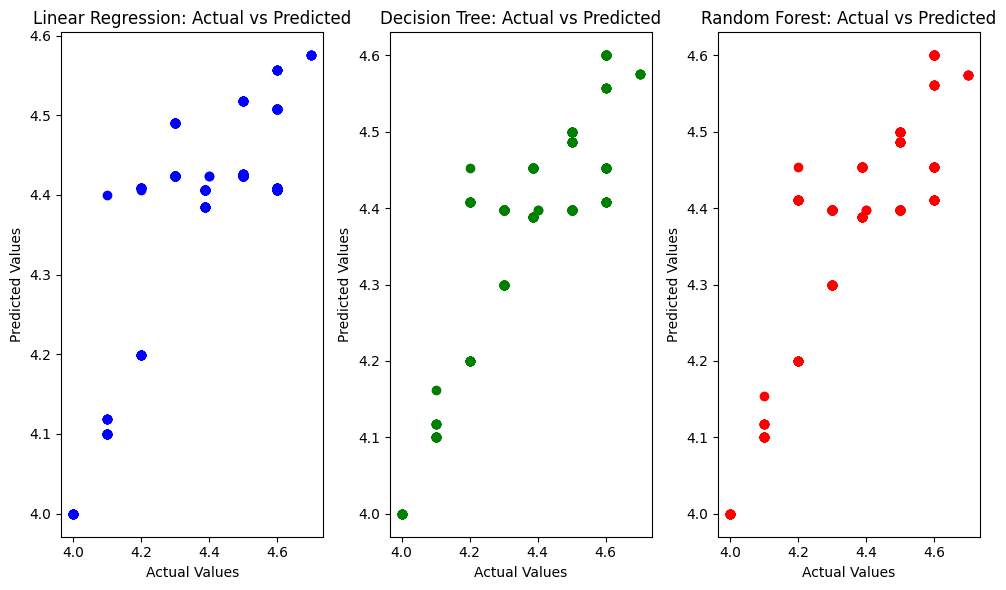

In [39]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_lr_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')

# Plot Actual vs Predicted for Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_dt_pred, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')

# Plot Actual vs Predicted for Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_rf_pred, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()


- In the left plot, the blue points represent the predicted values from the Linear Regression model. As we can see, the points are scattered and don't align closely with the diagonal line (where actual = predicted). This suggests that Linear Regression isn't a great fit for the data. The predicted values in the lower range are significantly off from the actual values, indicating that this model is struggling to capture the underlying patterns in the data.

- In the middle plot, the green points represent the predictions from the Decision Tree model. Here, we see better alignment with the diagonal line, which means the Decision Tree is performing better than Linear Regression. However, the points seem to cluster around certain predicted values, suggesting that the model might be overfitting. Overfitting happens when the model learns too much from the training data, including the noise, which can affect its performance on new data.

- Finally, in the right plot, the red points represent the predictions from the Random Forest model. The alignment with the diagonal is the closest among all three models, indicating that the Random Forest model is performing the best. The predictions are more accurate and consistent, which is typical for ensemble models like Random Forest, as they combine multiple decision trees to improve the accuracy and reduce overfitting.

In [41]:
# Compare the models' R-squared and MSE
print("Linear Regression R-squared:", r2)
print("Decision Tree R-squared:", dt_r2)
print("Random Forest R-squared:", rf_r2)



Linear Regression R-squared: 0.5389624783203244
Decision Tree R-squared: 0.7063417124396596
Random Forest R-squared: 0.7058795190061042


In [42]:

print("Linear Regression MSE:", mse)
print("Decision Tree MSE:", dt_mse)
print("Random Forest MSE:", rf_mse)


Linear Regression MSE: 0.0268833651086567
Decision Tree MSE: 0.008390458627149993
Random Forest MSE: 0.008403664502980041


Best Model: Based on both R-squared and MSE, Decision Tree and Random Forest perform the best, with similar performance. These models capture the non-linear relationships better than the linear regression model.
Linear Regression: It is less effective than the other two models, but still provides a baseline for comparison.

# 4 - Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters for Random Forest:", rf_grid_search.best_params_)

# Evaluate the best model
best_rf_model = rf_grid_search.best_estimator_
y_best_rf_pred = best_rf_model.predict(X_test)

# Evaluate the best model
best_rf_mse = mean_squared_error(y_test, y_best_rf_pred)
best_rf_r2 = r2_score(y_test, y_best_rf_pred)

print(f"Best Random Forest - Mean Squared Error: {best_rf_mse}")
print(f"Best Random Forest - R-squared: {best_rf_r2}")


Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest - Mean Squared Error: 0.008403664502980041
Best Random Forest - R-squared: 0.7058795190061042



Model Evaluation shows that with the best hyperparameters, the Random Forest model has relatively low error (MSE) and explains a significant portion of the variance (R²). This makes the model suitable for predicting service quality based on tourist volume.

In [27]:
import joblib

# Save the best model (e.g., Random Forest) for later use
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']